## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

### Q1.

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents.

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [3]:
! git clone https://github.com/Troy-S-Meink/PCA

fatal: destination path 'PCA' already exists and is not an empty directory.


In [4]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [5]:
# Accessing the phishing email content
df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
df.head()

,index,Unnamed: 0,Email Text,Email Type
0,0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
# Brreaking the "Email Text" column into words/tokens
df['Email Text'].str.split()

,Email Text
0,"[re, :, 6, ., 1100, ,, disc, :, uniformitarian..."
1,"[the, other, side, of, *, galicismos, *, *, ga..."
2,"[re, :, equistar, deal, tickets, are, you, sti..."
3,"[Hello, I, am, your, hot, lil, horny, toy., I,..."
4,"[software, at, incredibly, low, prices, (, 86,..."
...,...
18629,"[date, a, lonely, housewife, always, wanted, t..."
18630,"[request, submitted, :, access, request, for, ..."
18631,"[re, :, important, -, prc, mtg, hi, dorn, &, j..."
18632,"[press, clippings, -, letter, on, californian,..."


In [7]:
# This broke the email bodys into lists of words and some punctuation marks.

### Q2.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [8]:
with open('/content/PCA/05_PCA/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

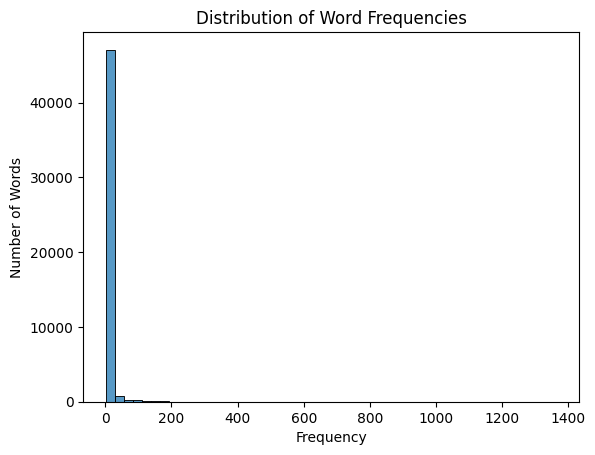

In [9]:
# Using seaborne to plot a histogram of the frequency of the tokens
token_freq_df = pd.DataFrame(token_freq, columns=['word', 'frequency'])

# Creating and labelling the histogram
sns.histplot(data=token_freq_df, x='frequency', bins=50)  # Adjust bins as needed
plt.title('Distribution of Word Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Number of Words')
plt.show()

In [10]:
# Printing the most frequently used tokens in token_freq_df
token_freq_df.head()

# It seems like there is a very large occurance of only a few words,
# with all other words being used infrequently if at all.

,word,frequency
0,new,1365
1,date,1202
2,get,1052
3,please,1022
4,enron,927


### Q3.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [11]:
# Accessing the data cleaned email data
phishing_df = pd.read_parquet('/content/PCA/05_PCA/Phishing_clean.parquet', engine='pyarrow') # Use read_parquet to read Parquet files
phishing_df.head()

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 1.

# Splitting the phishing_df into Y and X
Y = phishing_df['Email Type']
X = phishing_df.drop(columns=['Email Type'])

# Train-test splitting the data on an 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# 2.

# Running a linear regression on the test data
model = LinearRegression()
model.fit(X_train, Y_train)

Y_hat_test = model.predict(X_test)
Y_hat_train = model.predict(X_train)

In [15]:
# Finding the R^2 value on the test set using Y_test
r_squared_train = model.score(X_train, Y_train)
r_squared_test = model.score(X_test, Y_test)

print(f"R^2 on the training set: {r_squared_train}")
print(f"R^2 on the test set: {r_squared_test}")

R^2 on the training set: 0.7664380402824037
R^2 on the test set: -2.520398145909633e+21


In [16]:
# Interestingly, the R^2 on the test data is SIGNIFICANTLY worse than on the training data

In [17]:
# 3.

# Seeing what words have the largest coefficients in the model
coefficients = model.coef_
word_coefficients = list(zip(X.columns, coefficients))
word_coefficients.sort(key=lambda x: abs(x[1]), reverse=True)

# Printing the 10 words with the coefficients of largest absolute value
print("Top 10 words with largest coefficients:")
for word, coefficient in word_coefficients[:10]:
    print(f"{word}: {coefficient}")

Top 10 words with largest coefficients:
-0700: -11863918089724.537
1999: 6704711134387.79
2004: -6654233166445.736
3rd: -4939389885553.332
100%: 4590515377429.402
000: 4188227220808.812
-0400: 4076399336453.5435
830: -3912696997332.0747
70%: -3675179164241.3784
2nd: 3644811617837.5728


In [18]:
# It looks like most of the scam-related tokens are just various numbers or percents.

### Q4.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

<Axes: >

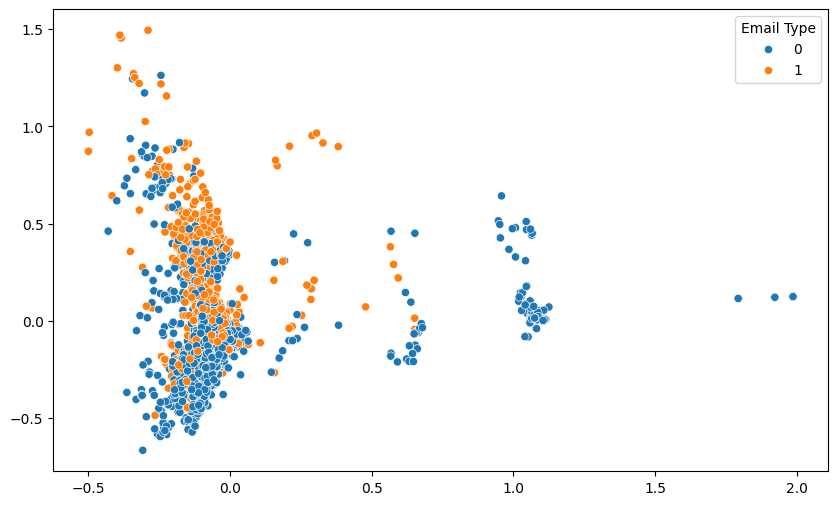

In [19]:
# Running the pricipal components analysis decomposition on X_train and X_test
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plotting the values with a hue based on Y_test
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=Y_test)

In [20]:
# It seems the non-phishing emails tend to be dispersed more towards
#  higher numbers of components.

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [21]:
# Running a linear regression on the first 2610 principal components of X
pca = PCA(n_components=2610).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = LinearRegression()
model.fit(X_train_pca, Y_train)

Y_hat_test = model.predict(X_test_pca)
Y_hat_train = model.predict(X_train_pca)

# Printing the R^2 values for each regressions
r_squared_train = model.score(X_train_pca, Y_train)
r_squared_test = model.score(X_test_pca, Y_test)
print(f"R^2 on the training set: {r_squared_train}")
print(f"R^2 on the test set: {r_squared_test}")

R^2 on the training set: 0.7662326827745849
R^2 on the test set: 0.6683390643101161


In [22]:
# PCA seems to have done a good job increasing the performance of the model on the test data.

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

In [ ]:
# Because the elements of the predictor matrix are made orthogonal (are
#  no longer covariate) the model could do a much better job fitting the data.